In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
X,y = make_classification(
    n_samples=300,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
    flip_y=0.1,
    class_sep=1.5
)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
gnb= GaussianNB()#genrative
gnb.fit(x_train,y_train)



GaussianNB()

In [25]:
lr=LogisticRegression()#discriminative
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
def plot_decision_boundary_with_probs(model,X,y ,ax, title,acc):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,200),np.linspace(y_min,y_max,200))
    print(xx.shape)
    print(yy.shape)
    #predict probab for class 1
    Z=model.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
    Z=Z.reshape(xx.shape)
    #[rpbab haeatmap
    contour = ax.contourf(xx,yy,Z,alpha = 0.3,cmap=plt.cm.coolwarm)
    plt.colorbar(contour,ax=ax)
    #decision boundary
    boundary = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    ax.contour(xx,yy,boundary,colors='k',linewidths=1)
    #datapoints
    ax.scatter(X[:,0],X[:,1],c=y,edgecolor='k',cmap=plt.cm.coolwarm)
    ax.set_title(f"{title}\n Accuracy: {acc:.2f}")

In [27]:
gnb_pred=gnb.predict(x_test)
lr_pred=lr.predict(x_test)

In [28]:
gnb_acc=accuracy_score(y_test,gnb_pred)
print(gnb_acc)

0.9444444444444444


In [29]:
lr_acc=accuracy_score(y_test,lr_pred)
print(lr_acc)

0.9444444444444444


(200, 200)
(200, 200)
(200, 200)
(200, 200)


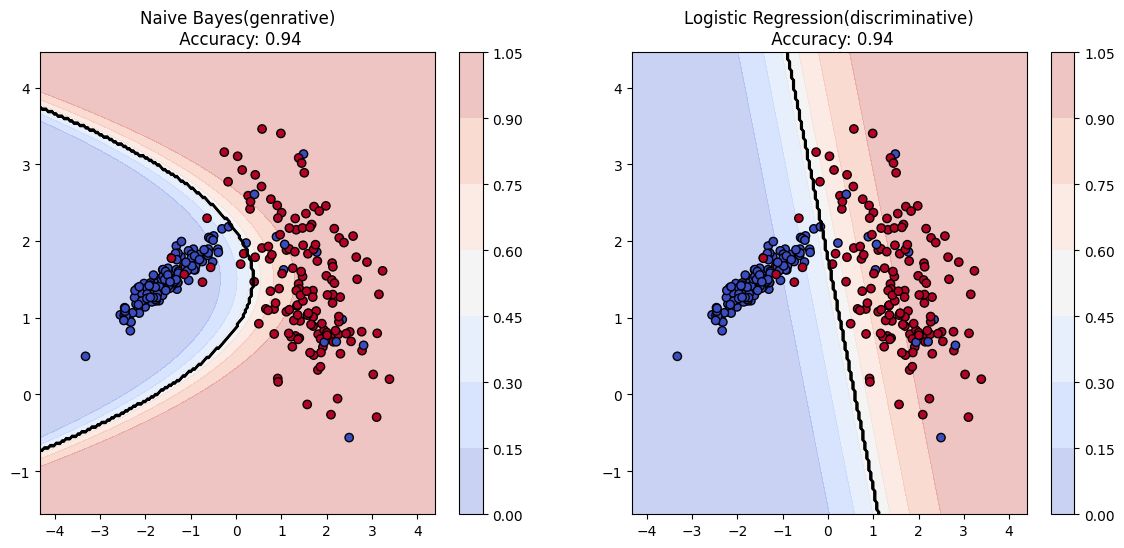

In [30]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
plot_decision_boundary_with_probs(gnb,X,y,axs[0],"Naive Bayes(genrative)",gnb_acc)
plot_decision_boundary_with_probs(lr,X,y,axs[1],"Logistic Regression(discriminative)",lr_acc)
plt.show()

In [32]:
print(gnb_acc)

0.9444444444444444


In [33]:
print(lr_acc)

0.9444444444444444
